In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
from scipy.fft import fft, fftfreq, ifft, next_fast_len
from scipy import signal
import pickle
from scipy.signal import blackman


In [2]:
# Carregando o arquivo de dados do SimCosta
wave_SC = np.genfromtxt('D:/Dropbox/Doutorado/Jupyter/GitHub/ADCP_Shear_SSC_Rouse/Raw_Data/SIMCOSTA_RS-4_OCEAN_2020-09-17_2020-11-03.tab', delimiter='\t')
# Convertendo a data e hora para datetime.datetime
dt = []
dt_stamp = []
for row in wave_SC[12:]:
    dt.append(datetime.datetime(int(row[0]), int(row[1]), int(row[2]), int(row[3]), int(row[4]), int(row[5])))
    dt_stamp.append(datetime.datetime.timestamp(datetime.datetime(int(row[0]), int(row[1]), int(row[2]), int(row[3]), int(row[4]), int(row[5]))))
# Obtendo as colunas necessárias
wave_h_SC = wave_SC[12:, 10]
wave_t_SC = wave_SC[12:, 9]
wave_dir_SC = wave_SC[12:, 8]
# Convertendo a direção das ondas para radianos
wave_dir_SC = np.deg2rad(wave_dir_SC)

(18522.49375, 18570.11875)

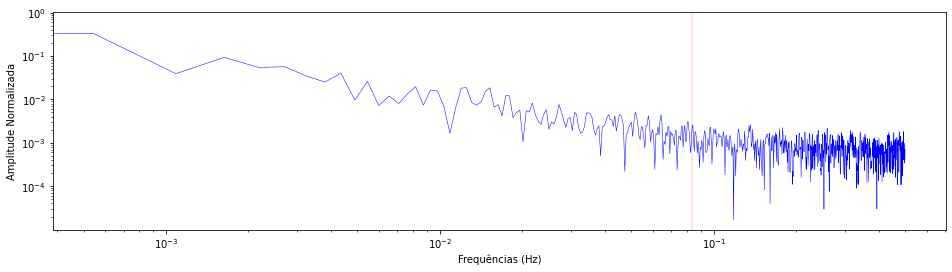

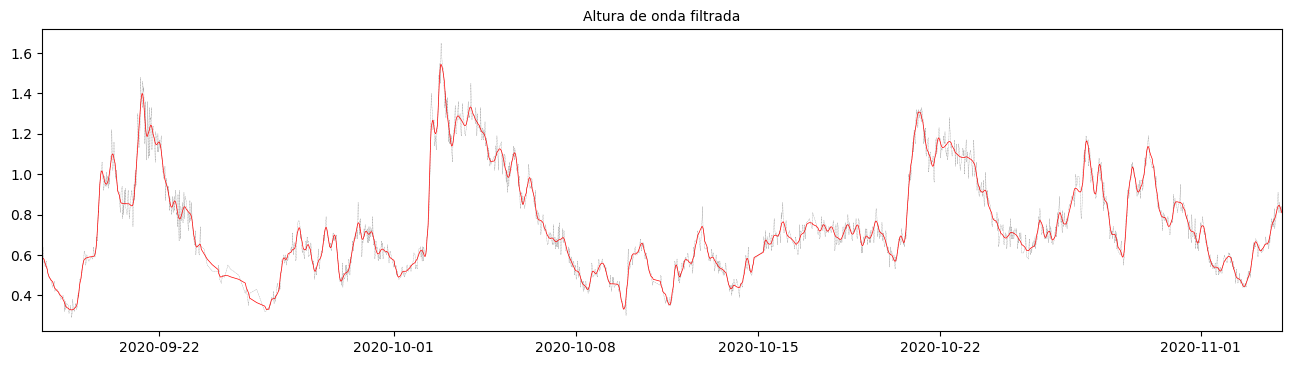

In [3]:
#Definindo a frequência de corte para o filtro de FFT.
trashU = wave_h_SC
n = len(trashU)
w = blackman(n)
t = 1
yf = fft(trashU*w)
xf = fftfreq(n, t)
yf = yf[0:n//2]
xf = xf[:n//2]
yf = 2.0/n * np.abs(yf)

plt.figure(figsize=(16,4))
plt.loglog((xf),(yf), color = 'b', linewidth = 0.5)
plt.xlabel('Frequências (Hz)')
plt.ylabel('Amplitude Normalizada')
plt.axvline(x= 1/12, color='r', linestyle='--', linewidth = 0.3)

fs = 1  #frequencia amostral = foi realizada coletas a cada um segundo
fc = 1/12  # Cut-off frequency of the filter (frequencia de corte)
w = fc / (fs / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'low')   #o que representa o 5?  'low' seria para passar apenas abaixo da frequencia de corte?
wave_H_fft = signal.filtfilt(b, a,  wave_h_SC)

fig, ax = plt.subplots(figsize=(16,4), dpi = 100)
ax.set_title("Altura de onda filtrada", fontsize=10)
ax.plot(dt, wave_h_SC,':',linewidth = 0.2, color = 'k')
ax.plot(dt, wave_H_fft ,linewidth = 0.5,color =  'r')
ax.set_xlim(np.min(dt), np.max(dt))


(18522.49375, 18570.11875)

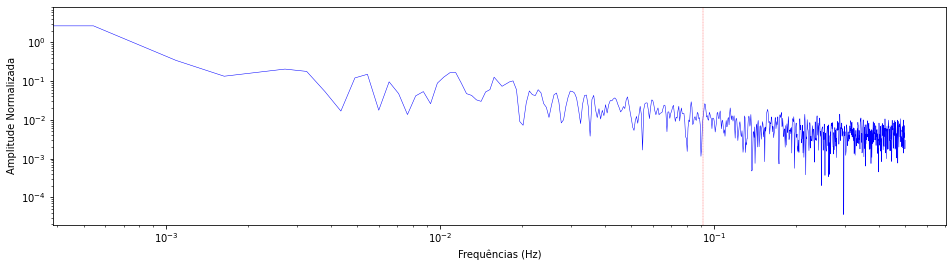

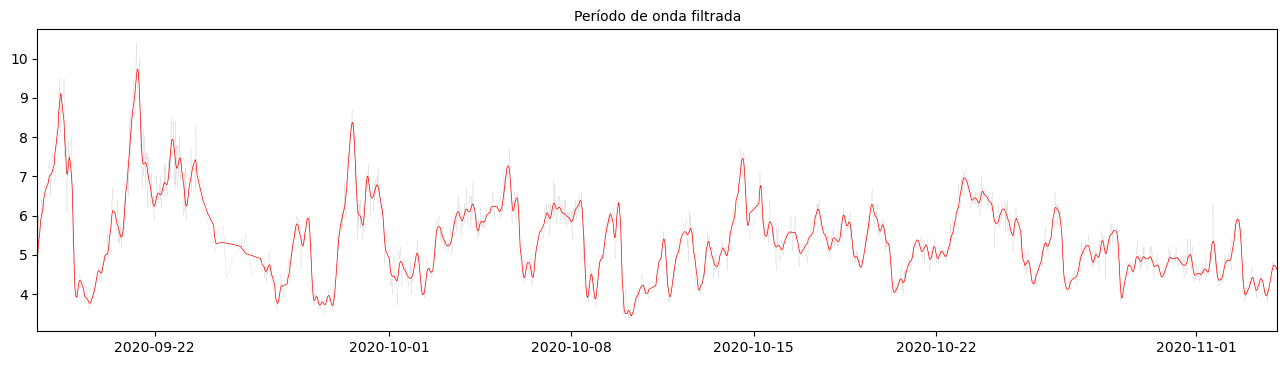

In [4]:
#Definindo a frequência de corte para o filtro de FFT.
trashU = wave_t_SC
n = len(trashU)#
w = blackman(n)
t = 1
yf = fft(trashU*w)
xf = fftfreq(n, t)
yf = yf[0:n//2]
xf = xf[:n//2]
yf = 2.0/n * np.abs(yf)

plt.figure(figsize=(16,4))
plt.loglog((xf),(yf), color = 'b', linewidth = 0.5)
plt.xlabel('Frequências (Hz)')
plt.ylabel('Amplitude Normalizada')
plt.axvline(x= 1/11, color='r', linestyle='--', linewidth = 0.3)

fs = 1  #frequencia amostral = foi realizada coletas a cada um segundo
fc = 1/11  # Cut-off frequency of the filter (frequencia de corte)
w = fc / (fs / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'low')   #o que representa o 5?  'low' seria para passar apenas abaixo da frequencia de corte?
wave_T_fft = signal.filtfilt(b, a,  wave_t_SC)

fig, ax = plt.subplots(figsize=(16,4), dpi = 100)
ax.set_title("Período de onda filtrada", fontsize=10)
ax.plot(dt, wave_t_SC,':',linewidth = 0.1, color = 'k')
ax.plot(dt, wave_T_fft ,linewidth = 0.5,color =  'r')
ax.set_xlim(np.min(dt), np.max(dt))


In [5]:
#Salvando os dados processados
roots = "D:/Dropbox/Doutorado/Jupyter/GitHub/ADCP_Shear_SSC_Rouse/Output_Data/"

with open(roots+'wave_T_fft.pkl', 'wb') as file:
    pickle.dump(wave_T_fft[12:1777], file)
    
with open(roots+'wave_H_fft.pkl', 'wb') as file:
    pickle.dump(wave_H_fft[12:1777], file)
    
with open(roots+'wave_dir_SC.pkl', 'wb') as file:
    pickle.dump(wave_dir_SC[12:1777], file)

with open(roots+'wave_dt_stamp.pkl', 'wb') as file:
    pickle.dump(dt_stamp[12:1777], file)

with open(roots+'wave_dt.pkl', 'wb') as file:
    pickle.dump(dt[12:1777], file)